In [1]:
import numpy as np  # For numerical computations
from scipy.optimize import minimize  # For numerical optimization
from sklearn.datasets import make_regression  # For generating synthetic datasets
from sklearn.linear_model import LinearRegression, Ridge  # For linear and ridge regression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler  # For polynomial feature generation
from sklearn.metrics import mean_squared_error, root_mean_squared_error  # For calculating mean squared error
import matplotlib.pyplot as plt  # For data visualization
import seaborn as sns  # For enhanced visualizations
import os  # For file operations
import time # For time tracking

# Synthetic Data Generation

X shape: (2502, 1)
y shape: (2502,)


<Axes: title={'center': 'Synthetic Data'}, xlabel='X', ylabel='y'>

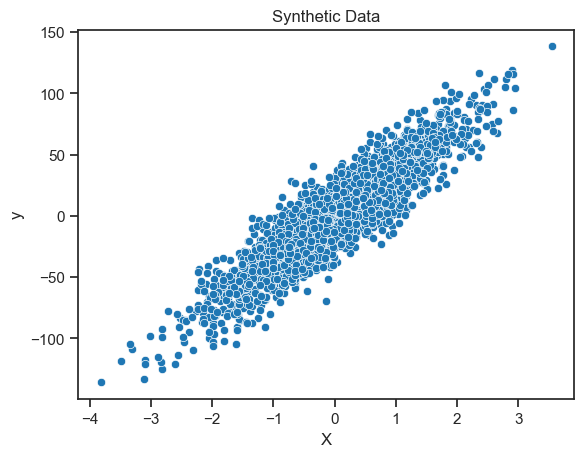

In [2]:
X, y = make_regression(n_samples=2502, n_features=1, noise=16, random_state=259202)

print("X shape:", X.shape) # X is N samples by D features [N,D]
print("y shape:", y.shape) # y is N samples [N,]

sns.set_context("notebook")
sns.set_style("ticks")
plt.xlabel('X')
plt.ylabel('y')
plt.title('Synthetic Data')
sns.scatterplot(x=X.flatten(),y=y)

# Analytical Linear Regression
Formula: w = (X^T X)^(-1) X^T y

w = [2,N] @ [N,2] = [2,2] ^ -1 -> [2,2] @ [2,N] = [2,N] -> [2,N] @ [N,] = [2,]


In [3]:
def analytical_linear_regression(X, y):

    X_ = np.c_[np.ones(X.shape[0]), X] # [N, D+1]

    w = np.linalg.inv(X_.T @ X_) @ X_.T @ y
    return w


weights = analytical_linear_regression(X, y)
print("w:", weights)

w: [-0.05959016 35.32283381]


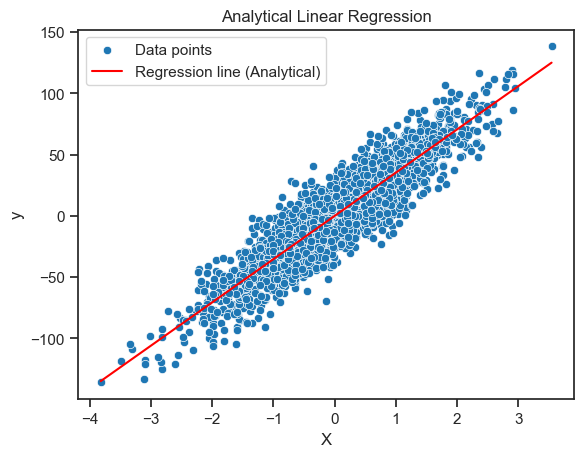

In [4]:
ones = np.ones(X.shape[0]) # [N,]
X_ = np.column_stack((ones, X)) 
y_pred = X_ @ weights

sns.set_context("notebook")
sns.set_style("ticks")
plt.xlabel('X')
plt.ylabel('y')
plt.title('Analytical Linear Regression')
sns.scatterplot(x=X.flatten(), y=y, label='Data points')
sns.lineplot(x=X.flatten(), y=y_pred, color='red', label='Regression line (Analytical)')
plt.legend()
plt.show()

# Numerical Linear Regression
Loss function L(w) = (1/N) * (y - X^T w)^T * (y - X^T w).

In [5]:
def loss_function(w, X, y):

    # [N, D+1] = [2502, 2]
    X_ = np.c_[np.ones(X.shape[0]), X] 
    
    y_pred = X_ @ w
    residuals = y - y_pred
    
    N = len(y)        
    loss = (1 / N) * (residuals.T @ residuals)

    return loss


result = minimize(
    fun=loss_function,
    x0=[100,-50],
    args=(X, y),
    method='Powell'
)

numerical_weights = result.x

print("w:", numerical_weights)
print("Iterations:", result.nit)
print("Evaluations", result.nfev)

w: [-0.05959002 35.32283381]
Iterations: 3
Evaluations 117


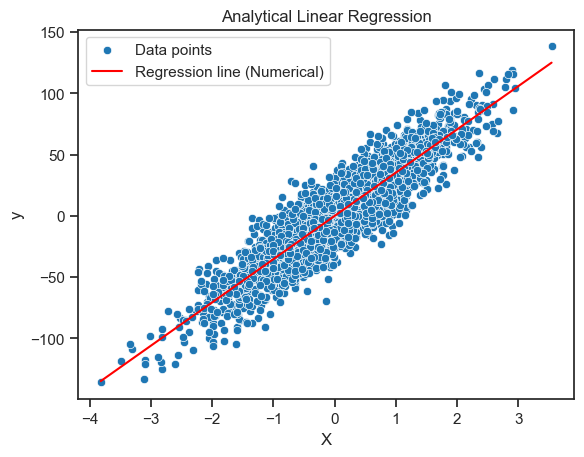

In [6]:
X_ = np.c_[np.ones(X.shape[0]), X]
y_pred_numerical = X_ @ numerical_weights

sns.set_context("notebook")
sns.set_style("ticks")
plt.xlabel('X')
plt.ylabel('y')
plt.title('Analytical Linear Regression')
sns.scatterplot(x=X.flatten(), y=y, label='Data points')
sns.lineplot(x=X.flatten(), y=y_pred_numerical, color='red', label='Regression line (Numerical)')
plt.legend()
plt.show()

In [7]:
start_time = time.time()
for _ in range(1000):
    analytical_weights = analytical_linear_regression(X, y)
analytical_time = time.time() - start_time

start_time = time.time()
for _ in range(1000):
    x0 = np.random.randn(2) 
    result = minimize(fun=loss_function, x0=x0, args=(X, y), method='Powell')
    numerical_weights = result.x
numerical_time = time.time() - start_time

print(f"Analytical time: {analytical_time:.6f} s")
print(f"Numerical time: {numerical_time:.6f} s")
print(f"Analitycal method is : {numerical_time/analytical_time:.2f}x faster than numerical method")

Analytical time: 0.057283 s
Numerical time: 0.870235 s
Analitycal method is : 15.19x faster than numerical method


In [8]:
filename = 'min_data.txt'
filepath = os.path.join("data", filename)

data = np.loadtxt(filepath, delimiter=',')
if filename == "min_data.txt":
    X_all = data[:, 0].reshape(-1, 1)
    y_all = data[:, 1]
    X_filtered = [X_all[0][0]]
    y_filtered = [y_all[0]]

    for i in range(1, len(y_all)):
        if y_all[i] != y_filtered[-1]:
            X_filtered.append(X_all[i][0])
            y_filtered.append(y_all[i])

    X = np.array(X_filtered).reshape(-1, 1)
    y = np.array(y_filtered)
else:
    X = data[:, 0].reshape(-1, 1)
    y = data[:, 1]

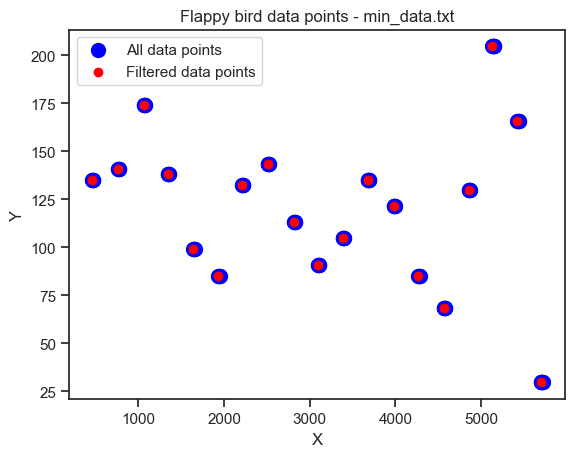

In [9]:
plt.scatter(X_all, y_all, color='blue',s=100, label='All data points') 
plt.scatter(X, y, color='red', label='Filtered data points')
plt.title('Flappy bird data points - min_data.txt')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

In [21]:
def load_data(filename, normalize=False):
    filepath = os.path.join("data", filename)
    data = np.loadtxt(filepath, delimiter=',')
    if filename == "min_data.txt":
        X_all = data[:, 0].reshape(-1, 1)
        y_all = data[:, 1]
        X_filtered = [X_all[0][0]]
        y_filtered = [y_all[0]]

        for i in range(1, len(y_all)):
            if y_all[i] != y_filtered[-1]:
                X_filtered.append(X_all[i][0])
                y_filtered.append(y_all[i])

        X = np.array(X_filtered).reshape(-1, 1)
        y = np.array(y_filtered)
    else:
        X = data[:, 0].reshape(-1, 1)
        y = data[:, 1]

    if normalize:
        y_min = np.min(y)
        y_max = np.max(y)
        y_range = y_max - y_min
        if y_range != 0:
            y = (y - y_min) / y_range

        scaler = StandardScaler()
        X = scaler.fit_transform(X)

    return X, y

In [11]:
def poly_regression(X, y, degree):

    poly = PolynomialFeatures(degree=degree, include_bias=False)
    X_poly = poly.fit_transform(X) # make X given polynomial

    model = LinearRegression().fit(X_poly, y) # fit model to polynomial features
    y_pred_sklearn = model.predict(X_poly) 

    mse = root_mean_squared_error(y, y_pred_sklearn)
    print(f"MSE sklearn (degree {degree}):", mse)

    w = analytical_linear_regression(X_poly, y) # [10,]
    X_ = np.c_[np.ones(X_poly.shape[0]), X_poly] # [19,9+1]
    y_pred_analytical = X_ @ w

    mse = root_mean_squared_error(y, y_pred_analytical)
    print(f"MSE analytical (degree {degree}):", mse,"\n")

    return model, w, poly

def compare_models(X, y):
    _, axs = plt.subplots(2, 2, figsize=(12, 8))
    
    degrees = [9, 21]

    for i, degree in enumerate(degrees):
        
        model, w, poly = poly_regression(X, y, degree)

        X_plot = np.linspace(X.min(), X.max(), 10000).reshape(-1, 1)
        X_plot_poly = poly.transform(X_plot)

        y_pred_sklearn = model.predict(X_plot_poly)

        X_plot_bias = np.c_[np.ones(X_plot_poly.shape[0]), X_plot_poly]
        y_pred_analytical = X_plot_bias @ w

        axs[i, 0].scatter(X, y, label='Data points')
        axs[i, 0].plot(X_plot, y_pred_sklearn, color="red")
        axs[i, 0].set_title(f'Degree {degree} - sklearn')
        axs[i, 0].set_xlabel('X')
        axs[i, 0].set_ylabel('Y')
        axs[i, 0].grid()
        axs[i, 0].legend()
        
        axs[i, 1].scatter(X, y, label='Data points')
        axs[i, 1].plot(X_plot, y_pred_analytical, color='green')
        axs[i, 1].set_title(f'Degree {degree} - Analytical')
        axs[i, 1].set_xlabel('X')
        axs[i, 1].set_ylabel('Y')
        axs[i, 1].grid()
        axs[i, 1].legend()

    plt.tight_layout()
    plt.suptitle(f'Polynomial Regression - {filename}', y=1.02, fontsize=16)
    plt.show()

min_data.txt
MSE sklearn (degree 9): 20.22480723013458
MSE analytical (degree 9): 20.224807230134573 

MSE sklearn (degree 21): 1.7130762266897102e-09
MSE analytical (degree 21): 360.45884775692116 



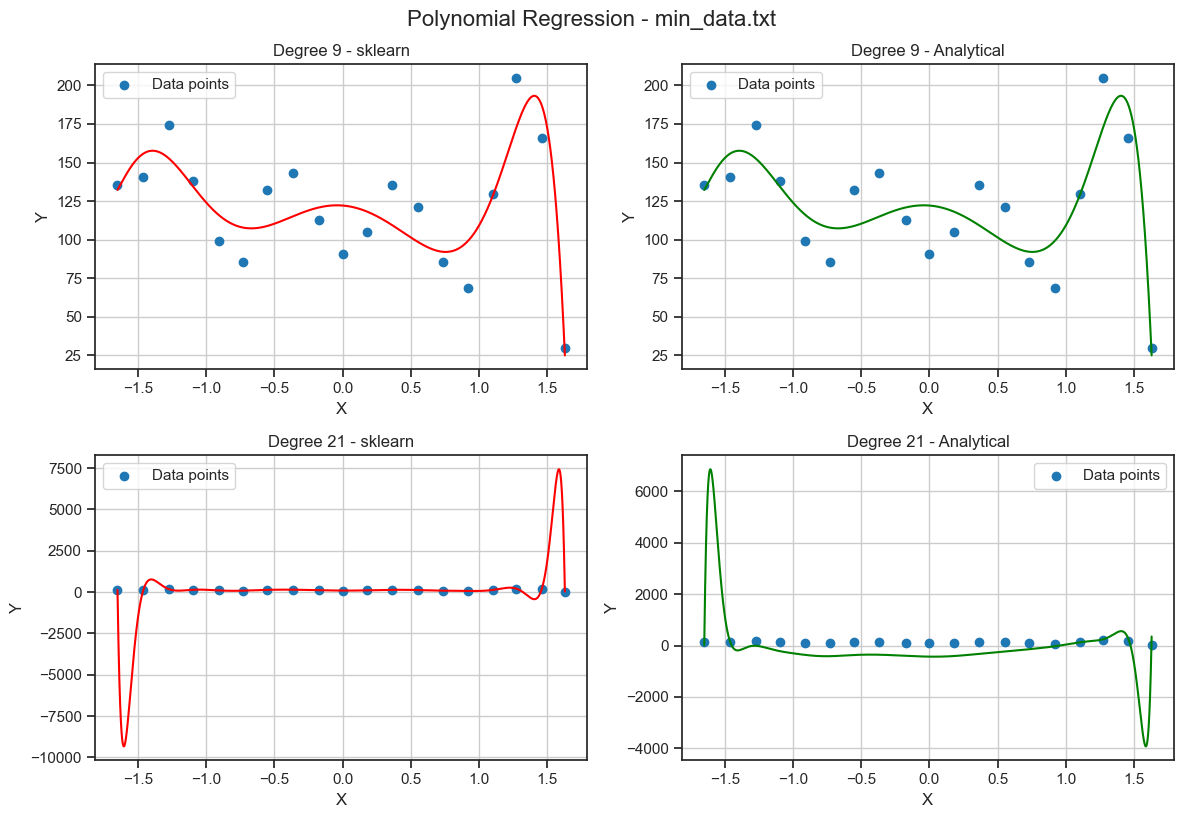

key_data.txt
MSE sklearn (degree 9): 17.68242367486579
MSE analytical (degree 9): 17.682423674865785 

MSE sklearn (degree 21): 4.488830821985102
MSE analytical (degree 21): 38.8104833594004 



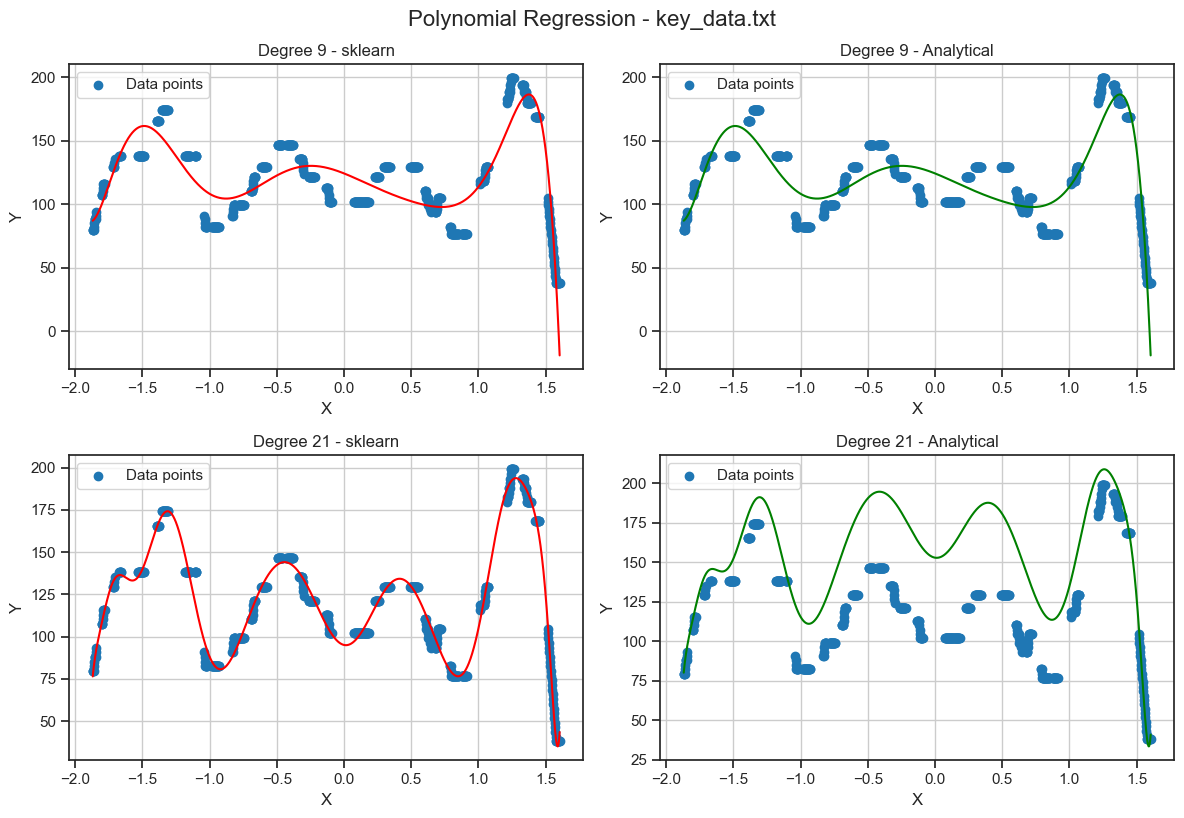

all_data.txt
MSE sklearn (degree 9): 21.511328873103583
MSE analytical (degree 9): 21.511328873103583 

MSE sklearn (degree 21): 8.644048501187443
MSE analytical (degree 21): 8.64584666406559 



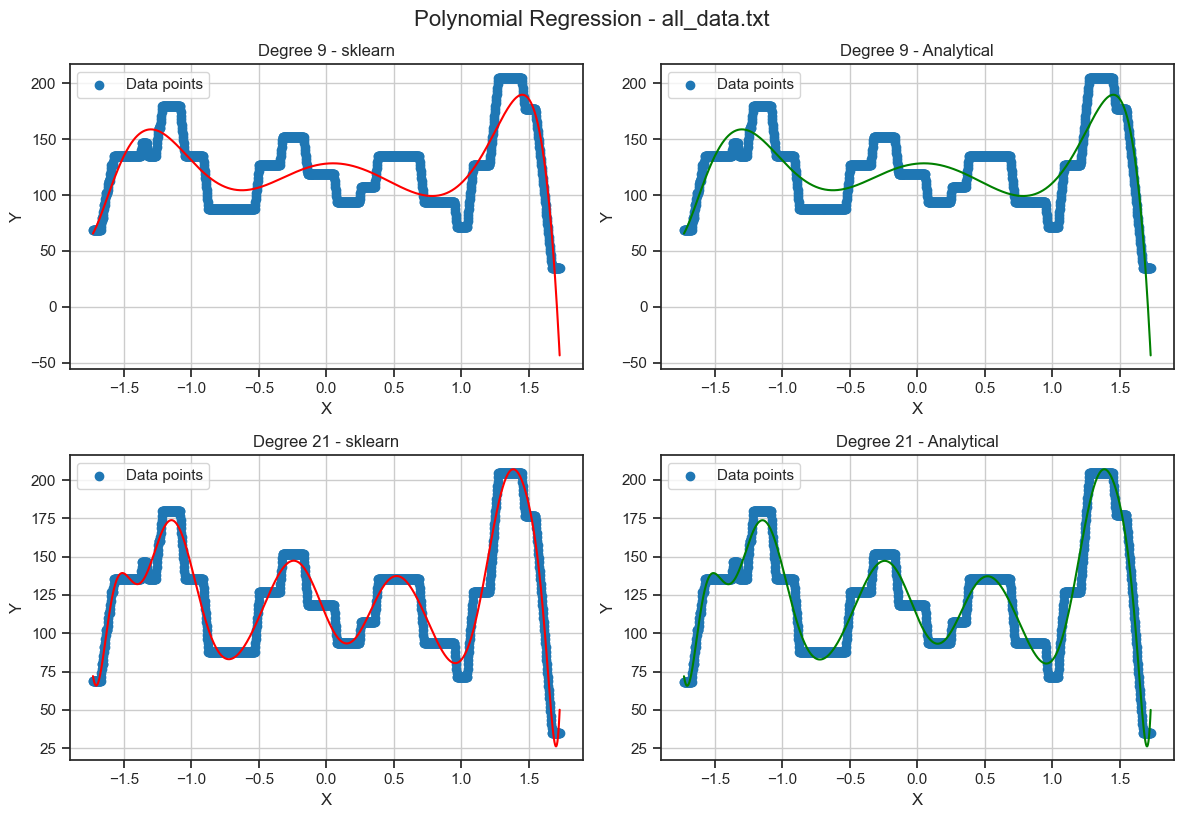

In [12]:
files = ["min_data.txt", "key_data.txt", "all_data.txt"]

for filename in files:
    print(filename)
    X, y = load_data(filename, normalize=True)
    compare_models(X, y)

In [13]:
files = ["min_data.txt", "key_data.txt", "all_data.txt"]
for filename in files:
        print(f"\n{filename}:")
        print("-" * 50)
        
        X, y = load_data(filename)
        
        poly9 = PolynomialFeatures(degree=9, include_bias=False)
        X_poly9 = poly9.fit_transform(X)
        
        start_time = time.time()
        for _ in range(1000):
            w_analytical9 = analytical_linear_regression(X_poly9, y)
        analytical_poly9_time = time.time() - start_time
        
        start_time = time.time()
        for _ in range(1000):
            model9 = LinearRegression().fit(X_poly9, y)
        sklearn_poly9_time = time.time() - start_time
        
        print(f"Polynomial Regression (degree 9):")
        print(f"  Analytical time: {analytical_poly9_time:.6f} s")
        print(f"  Sklearn time: {sklearn_poly9_time:.6f} s")
        
        if analytical_poly9_time <= sklearn_poly9_time:
            ratio9 = sklearn_poly9_time / analytical_poly9_time
            print(f"  Analytical method is {ratio9:.2f}x faster than sklearn\n")
        else:
            ratio9 = analytical_poly9_time / sklearn_poly9_time
            print(f"  Sklearn method is {ratio9:.2f}x faster than analytical\n")
        
        poly21 = PolynomialFeatures(degree=21, include_bias=False)
        X_poly21 = poly21.fit_transform(X)
        
        start_time = time.time()
        for _ in range(1000):
            w_analytical21 = analytical_linear_regression(X_poly21, y)
        analytical_poly21_time = time.time() - start_time
        
        start_time = time.time()
        for _ in range(1000):
            model21 = LinearRegression().fit(X_poly21, y)
        sklearn_poly21_time = time.time() - start_time
        
        print(f"Polynomial Regression (degree 21):")
        print(f"  Analytical time: {analytical_poly21_time:.6f} s")
        print(f"  Sklearn time: {sklearn_poly21_time:.6f} s")
        
        if analytical_poly21_time <= sklearn_poly21_time:
            ratio21 = sklearn_poly21_time / analytical_poly21_time
            print(f"  Analytical method is {ratio21:.2f}x faster than sklearn\n")
        else:
            ratio21 = analytical_poly21_time / sklearn_poly21_time
            print(f"  Sklearn method is {ratio21:.2f}x faster than analytical\n")


min_data.txt:
--------------------------------------------------
Polynomial Regression (degree 9):
  Analytical time: 0.103065 s
  Sklearn time: 0.219137 s
  Analytical method is 2.13x faster than sklearn

Polynomial Regression (degree 21):
  Analytical time: 0.232646 s
  Sklearn time: 0.231396 s
  Sklearn method is 1.01x faster than analytical


key_data.txt:
--------------------------------------------------
Polynomial Regression (degree 9):
  Analytical time: 0.123302 s
  Sklearn time: 0.255509 s
  Analytical method is 2.07x faster than sklearn

Polynomial Regression (degree 21):
  Analytical time: 0.450677 s
  Sklearn time: 2.080447 s
  Analytical method is 4.62x faster than sklearn


all_data.txt:
--------------------------------------------------
Polynomial Regression (degree 9):
  Analytical time: 0.156448 s
  Sklearn time: 1.335045 s
  Analytical method is 8.53x faster than sklearn

Polynomial Regression (degree 21):
  Analytical time: 0.745867 s
  Sklearn time: 1.769925 s
  A

In [14]:
def analytical_linear_regression_l2(X, y, lambda_):

    X_ = np.c_[np.ones(X.shape[0]), X] # [N, D+1]

    I = np.eye(X_.shape[1]) # [D+1, D+1]
    I_ = I*lambda_
    
    # (D+1, N) @ (N, D+1) = (D+1, D+1)  <- X_.T @ X_
    # (D+1, D+1) @ (D+1, N) = (D+1, N)  <- inv(X_.T @ X_ + I_) @ X_.T
    # (D+1, N) @ (N, 1) = (D+1, 1)      <- X_.T @ y
    w = np.linalg.inv(X_.T @ X_ + I_) @ X_.T @ y
    return w

In [15]:
def best_lambda_analytical(X, y):
    lowest_mse = float('inf')
    best_lambda = None
    best_weights = None
    for l in np.linspace(0.001, 3, 100):
        weights = analytical_linear_regression_l2(X, y, lambda_=l)
        X_ = np.c_[np.ones(X.shape[0]), X]
        y_pred_analytical_l2 = X_ @ weights
        mse_analytical_l2 = root_mean_squared_error(y, y_pred_analytical_l2)
        if mse_analytical_l2 < lowest_mse:
            lowest_mse = mse_analytical_l2
            best_lambda = l
            best_weights = weights

    return best_lambda, lowest_mse, best_weights

def best_lambda_sklearn(X, y):
    best_model_ridge = None
    best_lambda_ridge = None
    best_mse_ridge = float('inf')
    for scaling in [1.0, 0.1, 0.01, 10.0]:
        for l in np.linspace(0.001, 3, 25):
            alpha = l * scaling
            model_ridge = Ridge(alpha=alpha, fit_intercept=False).fit(X, y)
            mse_sklearn = root_mean_squared_error(y, model_ridge.predict(X))
            if mse_sklearn < best_mse_ridge:
                best_mse_ridge = mse_sklearn
                best_lambda_ridge = alpha
                best_model_ridge = model_ridge
            
    return best_lambda_ridge, best_mse_ridge, best_model_ridge

In [16]:
def compare_models_l2(X, y, filename):
    _, axs = plt.subplots(1, 2, figsize=(12, 4))

    poly = PolynomialFeatures(degree=16, include_bias=False)
    X_poly = poly.fit_transform(X)

    lambda_a, mse_analytical, w = best_lambda_analytical(X_poly, y)
    print(f"MSE analytical ridge: {mse_analytical:.4f} for lambda: {lambda_a:.4f}")

    lambda_s, mse_sklearn, model_ridge = best_lambda_sklearn(X_poly, y)
    print(f"MSE sklearn ridge: {mse_sklearn:.4f} for lambda: {lambda_s:.4f}")

    X_plot = np.linspace(X.min(), X.max(), 1000).reshape(-1, 1)
    X_plot_poly = poly.transform(X_plot)

    y_pred_sklearn_plot = model_ridge.predict(X_plot_poly)
    X_plot_bias = np.c_[np.ones(X_plot_poly.shape[0]), X_plot_poly]
    y_pred_analytical =  X_plot_bias @ w

    
    
    axs[0].scatter(X.flatten(), y, label='Data points')
    axs[0].plot(X_plot, y_pred_sklearn_plot, color='red')
    axs[0].set_title(f'Sklearn Ridge')
    axs[0].set_xlabel('X')
    axs[0].set_ylabel('Y')
    axs[0].grid(True)
    axs[0].legend()

    axs[1].scatter(X.flatten(), y, label='Data points')
    axs[1].plot(X_plot, y_pred_analytical, color='green')
    axs[1].set_title(f'Analytical Ridge')
    axs[1].set_xlabel('X')
    axs[1].set_ylabel('Y')
    axs[1].grid(True)
    axs[1].legend()
    
    plt.tight_layout()
    plt.suptitle(f'Ridge Regression - {filename} degree 16', y=1.02, fontsize=16)
    plt.show()

# Without normalization

min_data.txt
MSE analytical ridge: 165.5183 for lambda: 0.1828
MSE sklearn ridge: 455.7921 for lambda: 0.0013


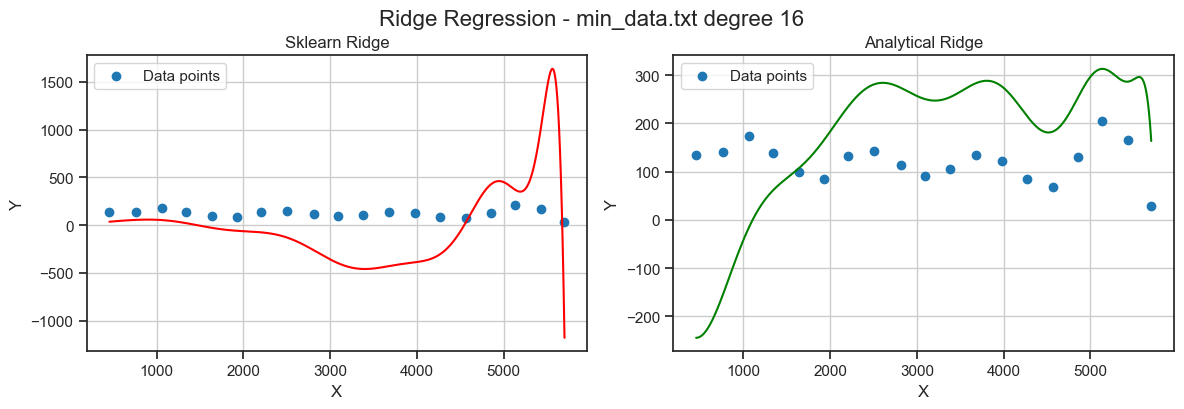

key_data.txt
MSE analytical ridge: 22.0870 for lambda: 0.9401
MSE sklearn ridge: 31683.3164 for lambda: 30.0000


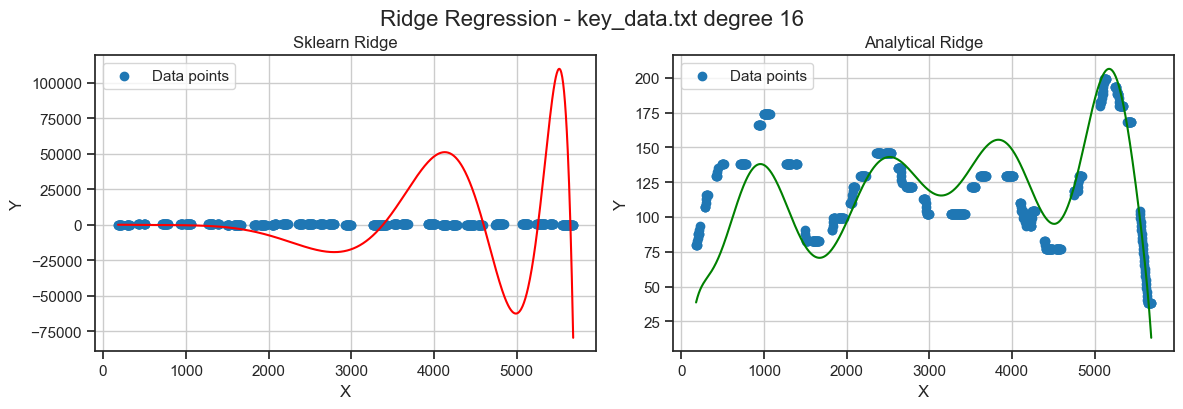

all_data.txt
MSE analytical ridge: 522.5448 for lambda: 0.0010
MSE sklearn ridge: 477.0718 for lambda: 0.1501


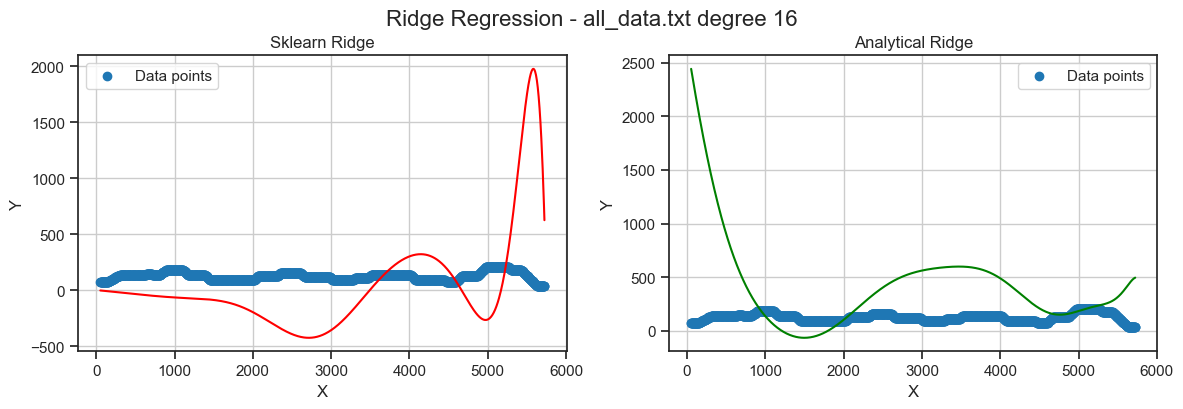

In [17]:
files = ["min_data.txt", "key_data.txt", "all_data.txt"]

for filename in files:
    print(filename)
    X, y = load_data(filename, normalize=False)
    compare_models_l2(X, y, filename)

# With normalization

min_data.txt
MSE analytical ridge: 8.1921 for lambda: 0.0010
MSE sklearn ridge: 28.4233 for lambda: 0.0000


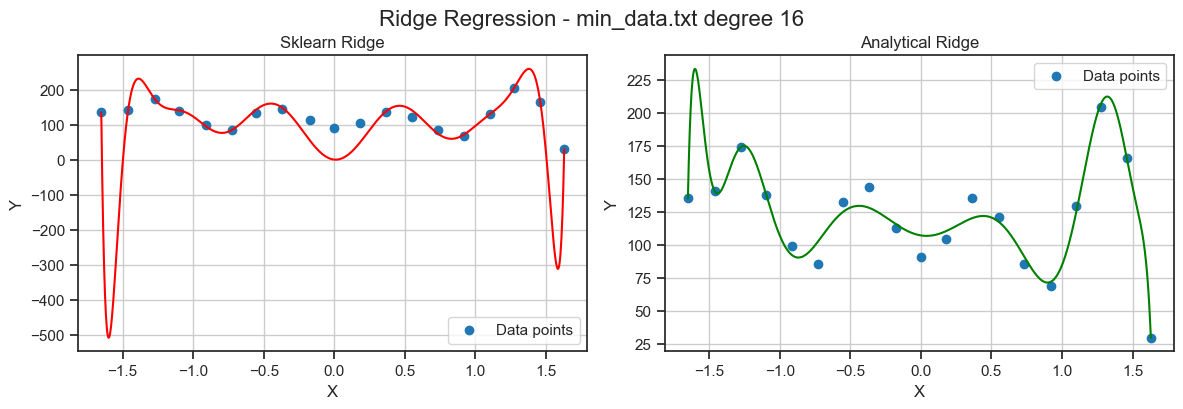

key_data.txt
MSE analytical ridge: 5.3667 for lambda: 0.0010
MSE sklearn ridge: 26.8111 for lambda: 0.0000


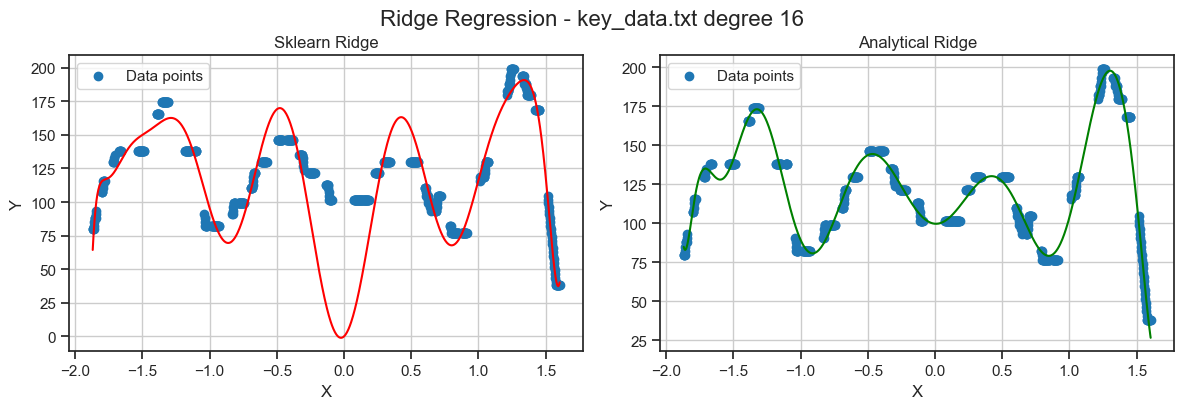

all_data.txt
MSE analytical ridge: 9.2452 for lambda: 0.0010
MSE sklearn ridge: 34.6848 for lambda: 0.0000


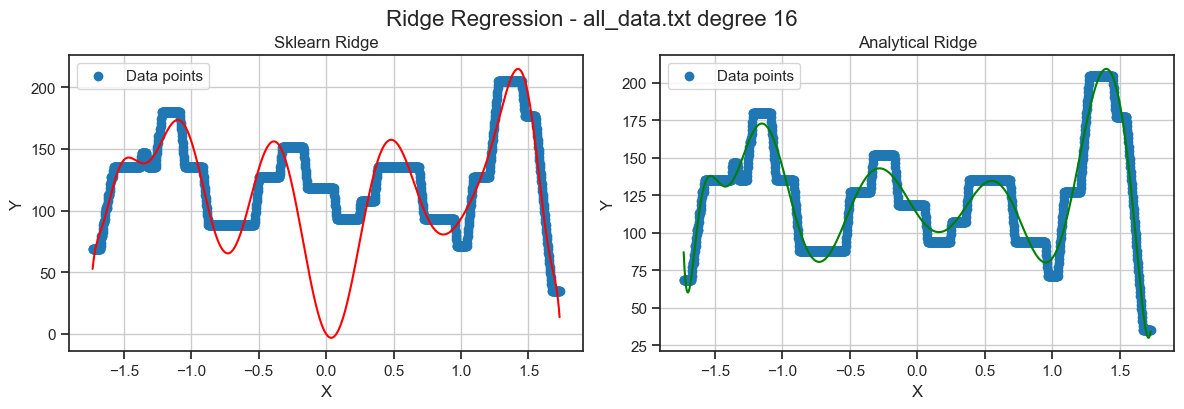

In [18]:
for filename in files:
    print(filename)
    X, y = load_data(filename, normalize=True)
    compare_models_l2(X, y, filename)

In [19]:
files = ["min_data.txt", "key_data.txt", "all_data.txt"]
for filename in files:
    print(f"\n{filename}:")
    print("-" * 50)

    X, y = load_data(filename)

    poly16 = PolynomialFeatures(degree=16, include_bias=False)
    X_poly16 = poly16.fit_transform(X)

    best_lambda_a, _, _ = best_lambda_analytical(X_poly16, y)
    best_lambda_s, _, _ = best_lambda_sklearn(X_poly16, y)

    start_time = time.time()
    for _ in range(1000):
        w_analytical_ridge = analytical_linear_regression_l2(X_poly16, y, best_lambda_a)
    analytical_ridge_time = time.time() - start_time

    start_time = time.time()
    for _ in range(1000):
        model_ridge = Ridge(alpha=best_lambda_s, fit_intercept=False).fit(X_poly16, y)
    sklearn_ridge_time = time.time() - start_time

    print(f"Ridge Regression (degree 16):")
    print(f"  Analytical time: {analytical_ridge_time:.6f} s")
    print(f"  Sklearn time: {sklearn_ridge_time:.6f} s")

    if analytical_ridge_time <= sklearn_ridge_time:
        ratio_ridge = sklearn_ridge_time / analytical_ridge_time
        print(f"  Analytical method is {ratio_ridge:.2f}x faster than sklearn\n")
    else:
        ratio_ridge = analytical_ridge_time / sklearn_ridge_time
        print(f"  Sklearn method is {ratio_ridge:.2f}x faster than analytical\n")


min_data.txt:
--------------------------------------------------
Ridge Regression (degree 16):
  Analytical time: 0.124055 s
  Sklearn time: 0.294034 s
  Analytical method is 2.37x faster than sklearn


key_data.txt:
--------------------------------------------------
Ridge Regression (degree 16):
  Analytical time: 0.259084 s
  Sklearn time: 3.028544 s
  Analytical method is 11.69x faster than sklearn


all_data.txt:
--------------------------------------------------
Ridge Regression (degree 16):
  Analytical time: 0.394123 s
  Sklearn time: 2.301791 s
  Analytical method is 5.84x faster than sklearn



# Results
* for small polynomials (with degree 9), both analytical and sklearn regression fits perfect, having same scores
* for bigger degrees of polynomial its too much dimentions, for small amout of samples, without regularization and normalization analytical implementation is much worse than sklearn
* after normalization both X and Y, results are much better, because especially with big degrees of polynomial like 16 or 21, if X reaches 5000 units, X^16 is huge. Therefore matrix (X^T @ X) is nearly singular, which makes inverse of that matrix numericaly unstable what can be seen in results.
* after normalization both X and Y, sklearn scores better than analytical
* after normalization both X and Y with Ridge regularization, analytical regression scores better thank sklearn implementation
* analytical regression in faster than sklearn
* why normalize Y too? For this case, when dealing with matrix multiplication with high degree polynomials its more numerical stable to normalize Y too